<a href="https://colab.research.google.com/github/trituenhantaoio/python_tutorials/blob/main/T%E1%BA%A1o_trading_bot_v%E1%BB%9Bi_Python_trituenhantao_io.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tạo trading bot với Python

Trong bài này, chúng ta sẽ lập trình trading bot tự động ra quyết định mua và bán. Chiến lược chính là sử dụng hai đường trung bình SMA30 và SMA100. Khi hai đường trung bình này cắt nhau là lúc cần ra quyết định mua và bán.

##Chuẩn bị thư viện và dữ liệu

Import thư viện cần thiết

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

Tải dữ liệu, ta sẽ sử dụng dữ liệu mẫu của matplotlib

In [ ]:
!git clone https://github.com/matplotlib/sample_data/ data

Cloning into 'data'...
remote: Enumerating objects: 80, done.
remote: Total 80 (delta 0), reused 0 (delta 0), pack-reused 80
Unpacking objects: 100% (80/80), done.


In [ ]:
AAPL = pd.read_csv("data/aapl.csv")[:1000]
AAPL = AAPL.sort_values(by='Date', ascending=1,ignore_index=True)
AAPL

,Date,Open,High,Low,Close,Volume,Adj Close
0,2004-10-26,47.45,48.05,46.97,47.97,21227200,23.99
1,2004-10-27,48.51,50.62,48.17,50.30,42624800,25.15
2,2004-10-28,49.98,52.22,49.50,52.19,30866600,26.09
3,2004-10-29,51.84,53.20,51.80,52.40,28936400,26.20
4,2004-11-01,52.50,53.26,52.04,52.45,21501800,26.23
...,...,...,...,...,...,...,...
995,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79
996,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
997,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
998,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26


Thể hiện dữ liệu lên trên biểu đồ

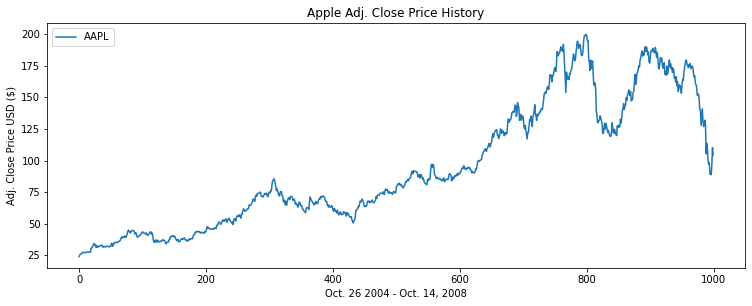

In [ ]:
plt.ﬁgure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Oct. 26 2004 - Oct. 14, 2008')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

##Tạo và hiển thị các đường trung bình

Tạo đường trung bình 30 ngày và đường trung bình 100 ngày

In [ ]:
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window=30).mean()
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window=100).mean()

Hiển thị biến động giá cùng hai đường trung bình

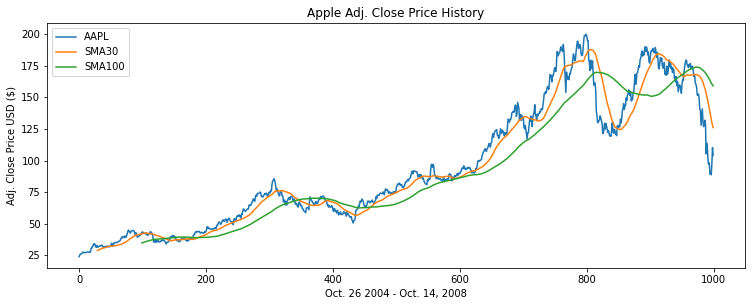

In [ ]:
plt.ﬁgure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Oct. 26 2004 - Oct. 14, 2008')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

##Tạo trading bot

Lưu biến động giá và các đường trung bình vào cùng một biến DataFrame

In [ ]:
data = pd.DataFrame()

data['AAPL'] = AAPL['Adj Close']
data['SMA30']= SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,AAPL,SMA30,SMA100
0,23.99,NaN,NaN
1,25.15,NaN,NaN
2,26.09,NaN,NaN
3,26.20,NaN,NaN
4,26.23,NaN,NaN
...,...,...,...
995,89.79,135.581000,162.3541
996,88.74,132.716667,161.4055
997,96.80,130.152000,160.5145
998,110.26,128.176333,159.8352


Cài đặt thuật toán để ra quyết định mua bán. Ý tưởng chung là xét biến động giá và các đường trung bình theo trục thời gian. Khi hai đường trung bình giao nhau, thuật toán sẽ đánh dấu tín hiệu mua bán.

In [ ]:
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell=[]
  flag = -1
  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return (sigPriceBuy, sigPriceSell)

Lưu tín hiệu mua bán vào data

In [ ]:
buy_sell = buy_sell(data)
data['Buy_Signal'] = buy_sell[0]
data['Sell_Signal'] = buy_sell[1]

##Hiển thị kết quả cuối cùng

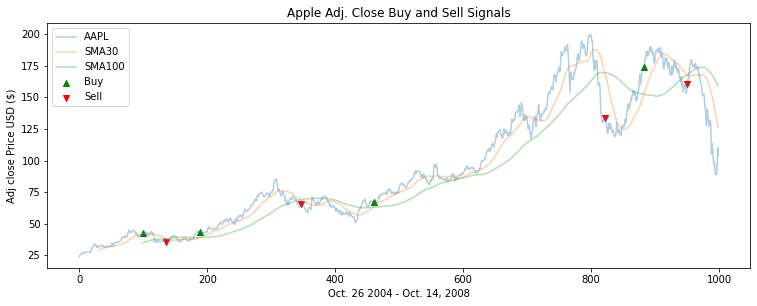

In [ ]:
plt.figure(figsize=(12.6, 4.5))

plt.plot(data['AAPL'], label = 'AAPL', alpha=0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha=0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha=0.35)

plt.scatter(data.index, data['Buy_Signal'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal'], label = 'Sell', marker='v', color = 'red')
plt.title('Apple Adj. Close Buy and Sell Signals')

plt.xlabel('Oct. 26 2004 - Oct. 14, 2008')
plt.ylabel('Adj close Price USD ($)')

plt.legend(loc='upper left')
plt.show()